<a href="https://colab.research.google.com/github/Dxsonu7/Heart-Watcher/blob/main/Heartwatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
# read data
data = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
# list data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Encode categorical variables ('GenHealth' and 'Race') into numeric values for easier processing and analysis
encode=LabelEncoder()

data['GenHealth']=encode.fit_transform(data['GenHealth'])
data['Race']=encode.fit_transform(data['Race'])


In [ ]:
# Data cleaning
for col in data.columns:
    data[col] = data[col].replace('Yes',1) # replacing 'yes' to 1
    data[col] = data[col].replace('No',0)
    data[col] = data[col].replace('Male',1) # Male value as 1
    data[col] = data[col].replace('Female',0) # Female as 0
    data[col] = data[col].replace('No, borderline diabetes',0)
    data[col] = data[col].replace('Yes (during pregnancy)',1)
    data[col] = data[col].replace('55-59',55) # range 55-50 to '55'
    data[col] = data[col].replace('80 or older',80) # range 80+ to '80'
    data[col] = data[col].replace('65-69',65) # range 65-69 to '65'
    data[col] = data[col].replace('75-79',75) # 75-79 to 75
    data[col] = data[col].replace('40-44',40) # 40-44 to 40
    data[col] = data[col].replace('70-74',70) # 70-74 to 70
    data[col] = data[col].replace('60-64',60) # 60-64 to 60
    data[col] = data[col].replace('50-54',50) # 50-54 to 50
    data[col] = data[col].replace('45-49',45) # so on
    data[col] = data[col].replace('18-24',18)
    data[col] = data[col].replace('35-39',35)
    data[col] = data[col].replace('30-34',30)
    data[col] = data[col].replace('25-29',25)
    data[col] = data[col].astype(int) # column data type is "integer" since we did data processing

<ipython-input-7-db6548689ac0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('No',0)
<ipython-input-7-db6548689ac0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('No',0)
<ipython-input-7-db6548689ac0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16,1,0,0,3,30,0,0,55,5,1,1,4,5,1,0,1
1,0,20,0,0,1,0,0,0,0,80,5,0,1,4,7,0,0,0
2,0,26,1,0,0,20,30,0,1,65,5,1,1,1,8,1,0,0
3,0,24,0,0,0,0,0,0,0,75,5,0,0,2,6,0,0,1
4,0,23,0,0,0,28,0,1,0,40,5,0,1,4,8,0,0,0


In [ ]:
df_encoded = pd.get_dummies(data, drop_first=True)

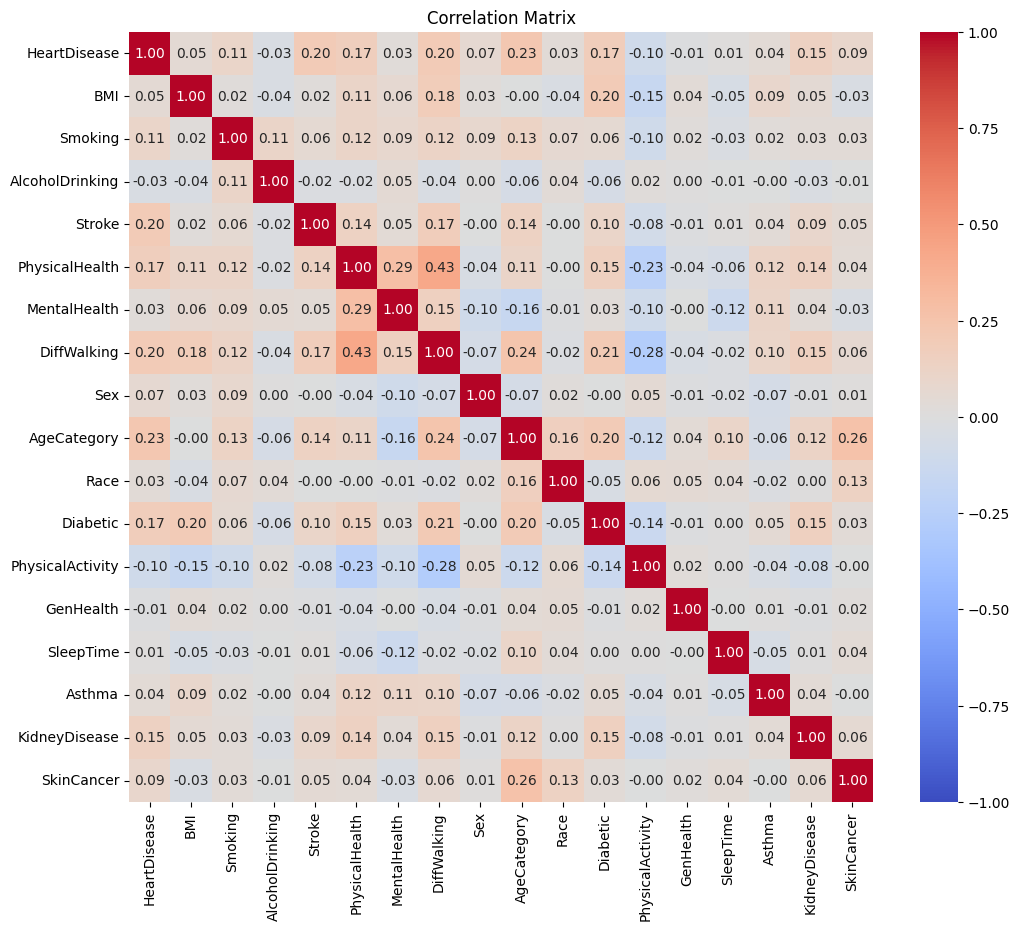

In [ ]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

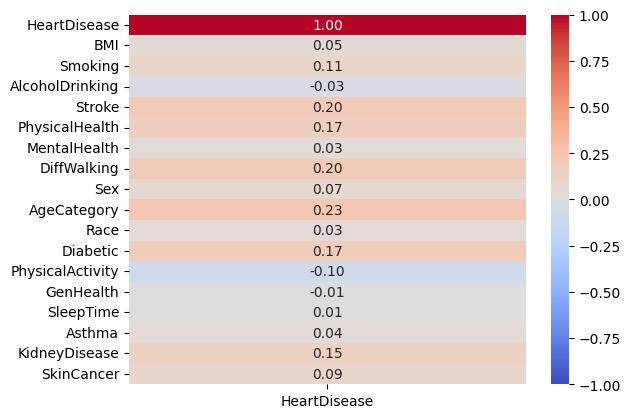

In [ ]:
sns.heatmap(correlation_matrix[['HeartDisease']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58367
           1       0.18      0.16      0.17      5592

    accuracy                           0.86     63959
   macro avg       0.55      0.54      0.55     63959
weighted avg       0.86      0.86      0.86     63959



In [ ]:
confusion_matrix(y_test, y_pred)

array([[54316,  4051],
       [ 4709,   883]])

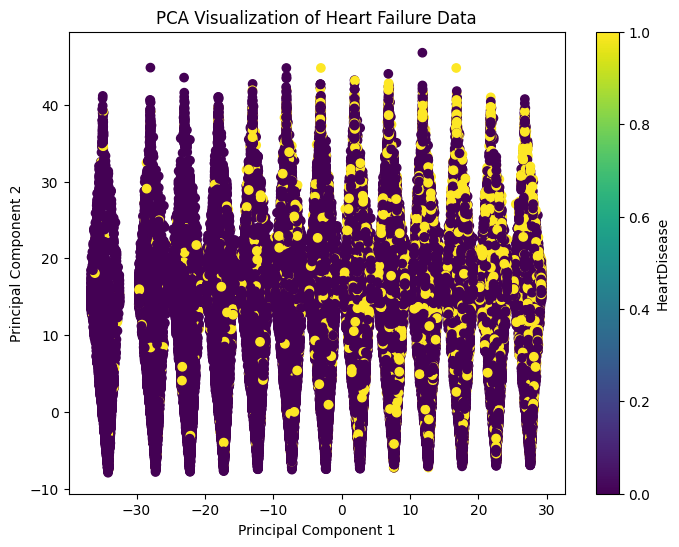

Explained Variance Ratio: [0.65771859 0.16455897]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Heart Failure Data")
plt.colorbar(label="HeartDisease")
plt.show()

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

In [ ]:
# XGBOOST MODEL
df=data

In [ ]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
x=df.drop('HeartDisease',axis=1).values
y=df['HeartDisease'].values

In [ ]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(x, y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
Y.mean()

In [ ]:
xgb = XGBClassifier(n_estimators= 500 , max_depth= 3 , learning_rate = 0.1)

In [ ]:
xgb.fit(x_train , y_train);

In [ ]:
print (xgb.score(x_train , y_train))
print (xgb.score(x_test , y_test))

In [ ]:
print(classification_report(y_test,xgb.predict(x_test)))